<a href="https://colab.research.google.com/github/jay-thakur/Fake_News_Classifier/blob/main/fake_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset



In [123]:
cd '/content/drive/MyDrive/All/MS/Projects/Fake_News_Classifier/'

/content/drive/MyDrive/All/MS/Projects/Fake_News_Classifier


In [165]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
import torch
import torch.nn as nn

# Load the dataset

In [125]:
true_dataset = pd.read_csv('data/True.csv') 
fake_dataset = pd.read_csv('data/Fake.csv') 

In [126]:
true_dataset.shape

(21417, 4)

In [127]:
true_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [128]:
true_dataset.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [129]:
fake_dataset.shape

(23481, 4)

In [130]:
fake_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [131]:
fake_dataset.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [132]:
true_dataset["label"] = np.ones(true_dataset.shape[0], dtype=int)
true_dataset.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [133]:
fake_dataset["label"] = np.zeros(fake_dataset.shape[0], dtype=int)
fake_dataset.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [134]:
dataset = pd.concat((true_dataset, fake_dataset), axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [135]:
dataset = dataset.sample(frac=1)
dataset.head()

,title,text,subject,date,label
11382,"Building owner, manager arrested in South Kore...",SEOUL (Reuters) - South Korean police have arr...,worldnews,"December 26, 2017",1
1010,Ivanka Trump Just Said The Dumbest Thing Imag...,Ivanka Trump is a lot of things to her father ...,News,"June 26, 2017",0
3067,"Trump Is Going To Make Measles Great Again, W...",Donald Trump says he surrounds himself with t...,News,"January 10, 2017",0
16290,UK PM May appoints new Brexit representative i...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"October 27, 2017",1
17185,LEGAL IMMIGRATION OF MUSLIMS INVITED TO U.S. T...,Of course they have no plans to assimilate The...,Government News,"Jul 17, 2015",0


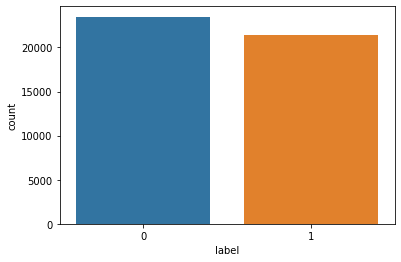

In [136]:
sns.countplot(dataset['label'])
plt.show()

In [137]:
dataset['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [138]:
df = pd.get_dummies(dataset, columns=["subject"])
df.head()

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
11382,"Building owner, manager arrested in South Kore...",SEOUL (Reuters) - South Korean police have arr...,"December 26, 2017",1,0,0,0,0,0,0,0,1
1010,Ivanka Trump Just Said The Dumbest Thing Imag...,Ivanka Trump is a lot of things to her father ...,"June 26, 2017",0,0,0,1,0,0,0,0,0
3067,"Trump Is Going To Make Measles Great Again, W...",Donald Trump says he surrounds himself with t...,"January 10, 2017",0,0,0,1,0,0,0,0,0
16290,UK PM May appoints new Brexit representative i...,LONDON (Reuters) - British Prime Minister Ther...,"October 27, 2017",1,0,0,0,0,0,0,0,1
17185,LEGAL IMMIGRATION OF MUSLIMS INVITED TO U.S. T...,Of course they have no plans to assimilate The...,"Jul 17, 2015",0,1,0,0,0,0,0,0,0


In [139]:
df = df.drop('date', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 11382 to 13652
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   label                    44898 non-null  int64 
 3   subject_Government News  44898 non-null  uint8 
 4   subject_Middle-east      44898 non-null  uint8 
 5   subject_News             44898 non-null  uint8 
 6   subject_US_News          44898 non-null  uint8 
 7   subject_left-news        44898 non-null  uint8 
 8   subject_politics         44898 non-null  uint8 
 9   subject_politicsNews     44898 non-null  uint8 
 10  subject_worldnews        44898 non-null  uint8 
dtypes: int64(1), object(2), uint8(8)
memory usage: 3.0+ MB


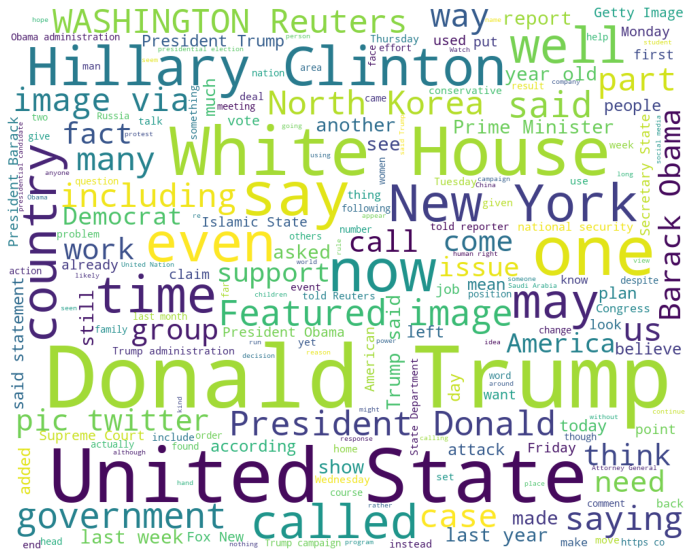

In [140]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1000, height=800)
wordcloud = wordcloud.generate(' '.join(df['text']))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [141]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Preprocess the data

In [142]:
def preprocess(data):
  pattern = "[^a-zA-Z]"
  lemmatizer = WordNetLemmatizer()
  new = []
  for txt in data:
    txt = txt.lower()
    txt = re.sub(pattern, " ", txt)
    txt = word_tokenize(txt)
    txt = [lemmatizer.lemmatize(word) for word in txt]
    txt = " ".join(txt)
    new.append(txt)
  return new

In [143]:
text_new = preprocess(df.text)
text_new[0]

'seoul reuters south korean police have arrested the owner and the manager of a building where people died in a fire last week accusing the pair of multiple safety lapse including blocked exit and malfunctioning sprinkler system on thursday a fire ripped through an eight story high rise in the small city of jecheon at least of the victim were woman who were overcome by toxic fume in a second floor sauna jecheon police have only identified the owner by his last name of lee and the manager by his last name of kim both men are in custody in jecheon after being arrested on sunday police announced on tuesday lee face two charge of violating fire safety regulation and committing involuntary homicide by professional negligence while kim also face the involuntary homicide charge if convicted of involuntary homicide lee and kim could face up to five year in prison or million won in fine the sprinkler system on the building s first floor did not work properly when the fire erupted a police detec

In [144]:
title_new = preprocess(df.title)
title_new[0]

'building owner manager arrested in south korean fire that killed'

In [145]:
title_vectorizer = CountVectorizer(stop_words="english", max_features = 1000)
text_vectorizer = CountVectorizer(stop_words="english", max_features = 4000)

title_vector = title_vectorizer.fit_transform(title_new).toarray() 
text_vector = text_vectorizer.fit_transform(text_new).toarray()

In [146]:
df.head()

,title,text,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
11382,"Building owner, manager arrested in South Kore...",SEOUL (Reuters) - South Korean police have arr...,1,0,0,0,0,0,0,0,1
1010,Ivanka Trump Just Said The Dumbest Thing Imag...,Ivanka Trump is a lot of things to her father ...,0,0,0,1,0,0,0,0,0
3067,"Trump Is Going To Make Measles Great Again, W...",Donald Trump says he surrounds himself with t...,0,0,0,1,0,0,0,0,0
16290,UK PM May appoints new Brexit representative i...,LONDON (Reuters) - British Prime Minister Ther...,1,0,0,0,0,0,0,0,1
17185,LEGAL IMMIGRATION OF MUSLIMS INVITED TO U.S. T...,Of course they have no plans to assimilate The...,0,1,0,0,0,0,0,0,0


In [147]:
df.drop(["title","text"],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 11382 to 13652
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    44898 non-null  int64
 1   subject_Government News  44898 non-null  uint8
 2   subject_Middle-east      44898 non-null  uint8
 3   subject_News             44898 non-null  uint8
 4   subject_US_News          44898 non-null  uint8
 5   subject_left-news        44898 non-null  uint8
 6   subject_politics         44898 non-null  uint8
 7   subject_politicsNews     44898 non-null  uint8
 8   subject_worldnews        44898 non-null  uint8
dtypes: int64(1), uint8(8)
memory usage: 2.3 MB


In [148]:
print(df.shape)
print(title_matrix.shape)
print(text_matrix.shape)

(44898, 9)
(44898, 1000)
(44898, 4000)


In [149]:
X = np.concatenate((np.array(df.drop("label", axis=1)), title_vector, text_vector), axis=1)
y = df['label']

In [150]:
print(X.shape)
print(y.shape)

(44898, 5008)
(44898,)


# Divide the dataset

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31428, 5008)
(13470, 5008)
(31428,)
(13470,)


# Logistic Regression

accuracy: 99.889


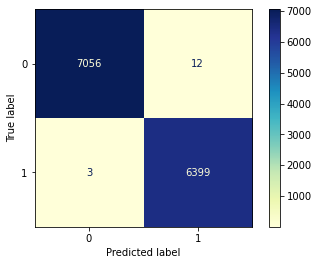

In [152]:
lr_model = LogisticRegression(max_iter=900)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)
print("accuracy: %0.3f" %(lr_acc*100))

plot_confusion_matrix(lr_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

# cm = confusion_matrix(y_test, lr_pred)
# sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='.2%')
# plt.show()

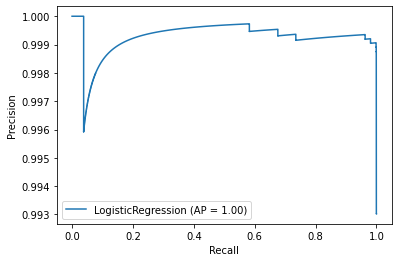

In [153]:
plot_precision_recall_curve(lr_model, X_test, y_test)
plt.show()

# Decision Tree Classifier

accuracy: 99.978


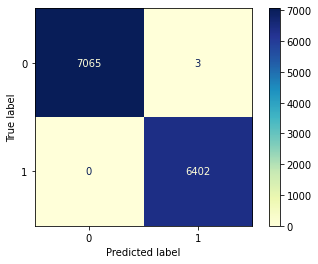

In [154]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
print("accuracy: %0.3f" %(dt_acc*100))

plot_confusion_matrix(dt_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

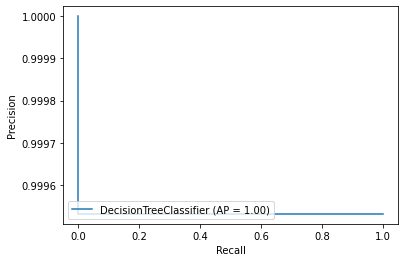

In [155]:
plot_precision_recall_curve(dt_model, X_test, y_test)
plt.show()

# Random Forest Classifier

accuracy: 99.970


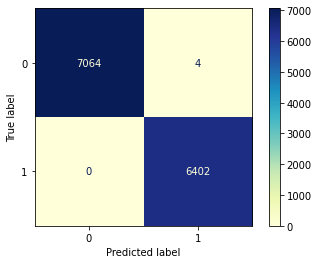

In [156]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
print("accuracy: %0.3f" %(rf_acc*100))

plot_confusion_matrix(rf_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

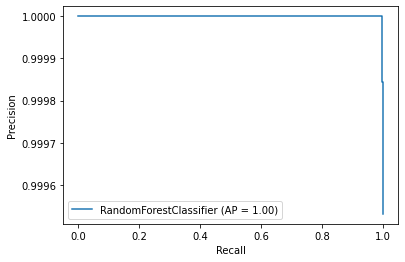

In [157]:
plot_precision_recall_curve(rf_model, X_test, y_test)
plt.show()

# Multinomial Naive Bayes

accuracy: 96.785


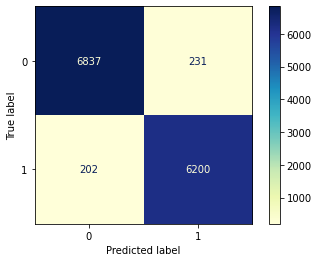

In [158]:
nbc_model = MultinomialNB()
nbc_model.fit(X_train, y_train)
nbc_pred = nbc_model.predict(X_test)

nbc_acc = accuracy_score(y_test, nbc_pred)
print("accuracy: %0.3f" %(nbc_acc*100))

plot_confusion_matrix(nbc_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

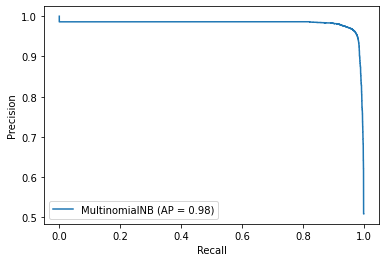

In [159]:
plot_precision_recall_curve(nbc_model, X_test, y_test)
plt.show()

alpha: 1e-06, accuracy : 98.16629547141797
alpha: 1e-05, accuracy : 97.9955456570156
alpha: 0.0001, accuracy : 97.7728285077951
alpha: 0.001, accuracy : 97.55753526354863
alpha: 0.01, accuracy : 97.3645137342242
alpha: 0.1, accuracy : 97.10467706013362
alpha: 1, accuracy : 96.78544914625093


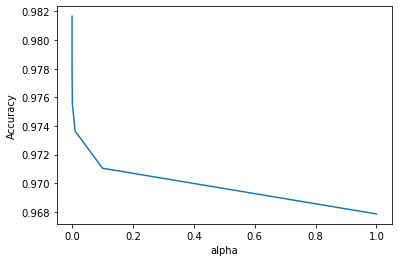

In [160]:
alpha_values = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
mnb_acc = []
for alpha in alpha_values:
    nbc_model_a = MultinomialNB(alpha)
    nbc_model_a.fit(X_train, y_train)
    nbc_a_pred = nbc_model_a.predict(X_test)
    acc = accuracy_score(y_test, nbc_a_pred)
    mnb_acc.append(acc)
    print(f'alpha: {alpha}, accuracy : {acc*100}')

sns.lineplot(alpha_values, mnb_acc)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

# ANN

## Activation Layer
### ReLu

## Dropout Layer

In [161]:
class Simple_Net(nn.Module):
    
    def __init__(self):
        
        super(Simple_Net,self).__init__()
        
        self.linear1 = nn.Linear(5008, 2000) 
        self.relu1 = nn.ReLU() 
        
        self.linear2 = nn.Linear(2000, 500) 
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(500, 100)
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(100, 20)
        self.relu4 = nn.ReLU()
        
        self.linear5 = nn.Linear(20, 2)
        
    
    def forward(self,x):
        
        out = self.linear1(x)
        out = self.relu1(out)
        
        out = self.linear2(out)
        out = self.relu2(out)
        
        out = self.linear3(out)
        out = self.relu3(out)
        
        out = self.linear4(out)
        out = self.relu4(out)

        out = self.linear5(out)
        
        return out
    

model = Simple_Net()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
error = nn.CrossEntropyLoss()

Epoch : 0, Loss : 0.6964759230613708
Epoch : 1, Loss : 4.791126251220703
Epoch : 2, Loss : 1.0741091966629028
Epoch : 3, Loss : 0.8768265247344971
Epoch : 4, Loss : 0.7022925019264221
Epoch : 5, Loss : 0.8886153697967529
Epoch : 6, Loss : 0.7600076198577881
Epoch : 7, Loss : 0.6730571985244751
Epoch : 8, Loss : 0.6558548808097839
Epoch : 9, Loss : 0.5938683748245239
Epoch : 10, Loss : 0.5398337244987488
Epoch : 11, Loss : 0.46635702252388
Epoch : 12, Loss : 0.36608371138572693
Epoch : 13, Loss : 0.22519661486148834
Epoch : 14, Loss : 0.14593306183815002
Epoch : 15, Loss : 0.10958855599164963
Epoch : 16, Loss : 0.09555521607398987
Epoch : 17, Loss : 0.0775347352027893
Epoch : 18, Loss : 0.05015462264418602
Epoch : 19, Loss : 0.04409535229206085


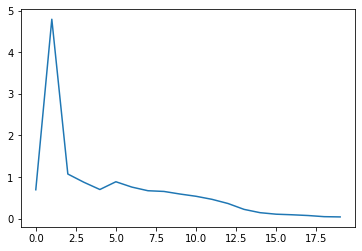

In [162]:
X_train = torch.Tensor(X_train)

y_train = torch.Tensor(y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

epochs = 20

losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = error(output, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss)
    print(f'Epoch : {epoch}, Loss : {loss}')

plt.plot(losses)

accuracy : 98.73051224944321%


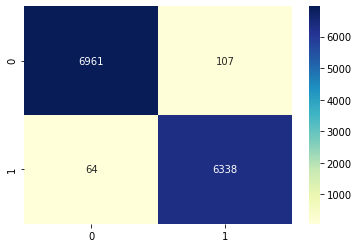

In [163]:
y_hat = model(X_test)
y_pred = torch.max(y_hat, 1)[1] # Convert pred into labels
nn_acc = accuracy_score(y_pred, y_test)
print(f'accuracy : {nn_acc*100}%')

cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')
plt.show()

### Experiment

**HyperParameter Tuning** - is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. for example learning rate, batch size

**Overfitting** - When out model performs poor on unseen data, means gives high accuracy on train data but less accuracy on test data, that is called as overfitting.

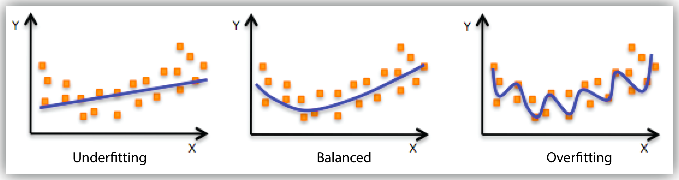


In [164]:
class Simple_Net1(nn.Module):
    
    def __init__(self):
        
        super(Simple_Net, self).__init__()
        
        self.linear1 = nn.Linear(5008, 2000) 
        self.relu1 = nn.ReLU() 
        
        self.linear2 = nn.Linear(2000, 500) 
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(500, 100)
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(100, 50)
        self.relu4 = nn.ReLU()

        self.linear5 = nn.Linear(50, 10)
        self.relu5 = nn.ReLU()
        
        self.linear6 = nn.Linear(10, 2)
        
    
    def forward(self,x):
        
        out = self.linear1(x)
        out = self.relu1(out)
        
        out = self.linear2(out)
        out = self.relu2(out)
        
        out = self.linear3(out)
        out = self.relu3(out)
        
        out = self.linear4(out)
        out = self.relu4(out)

        out = self.linear5(out)
        out = self.relu5(out)

        out = self.linear6(out)
        
        return out
    

model = Simple_Net1()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
error = nn.CrossEntropyLoss()

X_train = torch.Tensor(X_train)

y_train = torch.Tensor(y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

epochs = 50

losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = error(output, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss)
    print(f'Epoch : {epoch+1}, Loss : {loss}')

y_hat = model(X_test)
y_pred = torch.max(y_hat,1)[1] # Convert pred into labels

nn_acc_4_hl = accuracy_score(y_pred, y_test)
print(f'accuracy on 4 hidden layer : {nn_acc_4_hl}')

cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')
plt.show()

TypeError: ignored

# Model Accuracies

In [ ]:
models_accuracies = pd.DataFrame([["Logistic Regression", lr_acc], ["Naive Bayes", nbc_acc], ["Decision Tree", dt_acc],
                       ["Random Forest", rf_acc], ["Simple ANN", nn_acc]], columns=["Model", "Accuracy"])
models_accuracies

In [ ]:
x = ['LR', 'DT', 'RF', 'NB', 'ANN']
y = [lr_acc, dt_acc, rf_acc, nbc_acc, nn_acc]
sns.barplot(x, y)
plt.show()

## My Contribution



## Challanges & solutions



## References

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/naive_bayes.html

https://www.kaggle.com/mehmetlaudatekman/detailed-fake-news-classification-with-pytorch-98

http://datamine.unc.edu/jupyter/notebooks/Text%20Mining%20Modules/(1)%20Text%20Preprocessing.ipynb

https://en.wikipedia.org/wiki/Hyperparameter_optimization

https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html




In [ ]:
# X_train, x_valid, Y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify = y_train)
# x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.1, random_state=42, stratify = y_final)